In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("anggur.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,5.90,0.4451,0.1813,2.049401,0.070574,16.593818,42.27,0.9982,3.27,0.71,8.64,7
1,8.40,0.5768,0.2099,3.109590,0.101681,22.555519,16.01,0.9960,3.35,0.57,10.03,8
2,7.54,0.5918,0.3248,3.673744,0.072416,9.316866,35.52,0.9990,3.31,0.64,9.23,8
3,5.39,0.4201,0.3131,3.371815,0.072755,18.212300,41.97,0.9945,3.34,0.55,14.07,9
4,6.51,0.5675,0.1940,4.404723,0.066379,9.360591,46.27,0.9925,3.27,0.45,11.49,8


//KOLOM fixed_acidity

In [4]:
mean1=df["fixed acidity"].median()
mean2=df["volatile acidity"].mean()
mean3=df["citric acid"].mean()
mean4=df["residual sugar"].mean()
mean5=df["chlorides"].mean()
mean6=df["free sulfur dioxide"].mean()
mean7=df["total sulfur dioxide"].mean()
mean8=df["density"].mean()
mean9=df["pH"].mean()
mean10=df["sulphates"].mean()
mean11=df["alcohol"].mean()
mean12=df["quality"].mean()

print("Mean column 1 :",mean1)
print("Mean column 2 :",mean2)
print("Mean column 3 :",mean3)
print("Mean column 4 :",mean4)
print("Mean column 5 :",mean5)
print("Mean column 6 :",mean6)
print("Mean column 7 :",mean7)
print("Mean column 8 :",mean8)
print("Mean column 9 :",mean9)
print("Mean column 10 :",mean10)
print("Mean column 11 :",mean11)
print("Mean column 12 :",mean12)



Mean column 1 : 7.15
Mean column 2 : 0.5208385000000001
Mean column 3 : 0.27051699999999995
Mean column 4 : 2.5671036825067595
Mean column 5 : 0.08119515250784977
Mean column 6 : 14.907679251029796
Mean column 7 : 40.290150000000004
Mean column 8 : 0.9959253000000001
Mean column 9 : 3.30361
Mean column 10 : 0.5983899999999999
Mean column 11 : 10.592279999999999
Mean column 12 : 7.958


In [5]:
median1=df["fixed acidity"].median()
median2=df["volatile acidity"].median()
median3=df["citric acid"].median()
median4=df["residual sugar"].median()
median5=df["chlorides"].median()
median6=df["free sulfur dioxide"].median()
median7=df["total sulfur dioxide"].median()
median8=df["density"].median()
median9=df["pH"].median()
median10=df["sulphates"].median()
median11=df["alcohol"].median()
median12=df["quality"].median()

print("Median column 1 : ",median1)
print("Median column 2 : ",median2)
print("Median column 3 : ",median3)
print("Median column 4 : ",median4)
print("Median column 5 : ",median5)
print("Median column 6 : ",median6)
print("Median column 7 : ",median7)
print("Median column 8 : ",median8)
print("Median column 9 : ",median9)
print("Median column 10 : ",median10)
print("Median column 11 : ",median11)
print("Median column 12 : ",median12)


Median column 1 :  7.15
Median column 2 :  0.52485
Median column 3 :  0.2722
Median column 4 :  2.519430272865794
Median column 5 :  0.0821669021645236
Median column 6 :  14.860346236568924
Median column 7 :  40.19
Median column 8 :  0.996
Median column 9 :  3.3
Median column 10 :  0.595
Median column 11 :  10.61
Median column 12 :  8.0


In [6]:
modus1=df["fixed acidity"].mode()
modus2=df["volatile acidity"].mode()
modus3=df["citric acid"].mode()
modus4=df["residual sugar"].mode()
modus5=df["chlorides"].mode()
modus6=df["free sulfur dioxide"].mode()
modus7=df["total sulfur dioxide"].mode()
modus8=df["density"].mode()
modus9=df["pH"].mode()
modus10=df["sulphates"].mode()
modus11=df["alcohol"].mode()
modus12=df["quality"].mode()

print("Modus column 1 : ",modus1)
print("Modus column 2 : ",modus2)
print("Modus column 3 : ",modus3)
print("Modus column 4 : ",modus4)
# print("Modus column 5 : ",modus5)
# print("Modus column 6 : ",modus6)
# print("Modus column 7 : ",modus7)
print("Modus column 8 : ",modus8)
print("Modus column 9 : ",modus9)
print("Modus column 10 : ",modus10)
print("Modus column 11 : ",modus11)
print("Modus column 12 : ",modus12)



Modus column 1 :  0    6.54
Name: fixed acidity, dtype: float64
Modus column 2 :  0    0.5546
Name: volatile acidity, dtype: float64
Modus column 3 :  0    0.3019
Name: citric acid, dtype: float64
Modus column 4 :  0      0.032555
1      0.033333
2      0.051774
3      0.077156
4      0.084744
         ...   
995    5.210260
996    5.217429
997    5.252864
998    5.299524
999    5.550755
Name: residual sugar, Length: 1000, dtype: float64
Modus column 8 :  0    0.9959
1    0.9961
2    0.9965
3    0.9970
Name: density, dtype: float64
Modus column 9 :  0    3.34
Name: pH, dtype: float64
Modus column 10 :  0    0.59
Name: sulphates, dtype: float64
Modus column 11 :  0     9.86
1    10.31
Name: alcohol, dtype: float64
Modus column 12 :  0    8
Name: quality, dtype: int64


In [7]:
std_deviasi1=df["fixed acidity"].std()
std_deviasi2=df["volatile acidity"].std()
std_deviasi3=df["citric acid"].std()
std_deviasi4=df["residual sugar"].std()
std_deviasi5=df["chlorides"].std()
std_deviasi6=df["free sulfur dioxide"].std()
std_deviasi7=df["total sulfur dioxide"].std()
std_deviasi8=df["density"].std()
std_deviasi9=df["pH"].std()
std_deviasi10=df["sulphates"].std()
std_deviasi11=df["alcohol"].std()
std_deviasi12=df["quality"].std()

print("std_deviasi column 1 : ",std_deviasi1)
print("std_deviasi column 2 : ",std_deviasi2)
print("std_deviasi column 3 : ",std_deviasi3)
print("std_deviasi column 4 : ",std_deviasi4)
print("std_deviasi column 5 : ",std_deviasi5)
print("std_deviasi column 6 : ",std_deviasi6)
print("std_deviasi column 7 : ",std_deviasi7)
print("std_deviasi column 8 : ",std_deviasi8)
print("std_deviasi column 9 : ",std_deviasi9)
print("std_deviasi column 10 : ",std_deviasi10)
print("std_deviasi column 11 : ",std_deviasi11)
print("std_deviasi column 12 : ",std_deviasi12)

std_deviasi column 1 :  1.2015975764938258
std_deviasi column 2 :  0.09584827405534951
std_deviasi column 3 :  0.04909837147076348
std_deviasi column 4 :  0.9879154365046929
std_deviasi column 5 :  0.020110647243996742
std_deviasi column 6 :  4.888099705756562
std_deviasi column 7 :  9.965767376218295
std_deviasi column 8 :  0.0020201809426487133
std_deviasi column 9 :  0.10487548220040166
std_deviasi column 10 :  0.10081900799141187
std_deviasi column 11 :  1.5107060052287586
std_deviasi column 12 :  0.9028017783827471


In [8]:
# def variance(col):
#     tempTotal=0
#     mean=df[col].mean()
#     for number in df[col]:
#         difference=(mean-number)**2
#         tempTotal+=difference
    
#     return tempTotal/(len(df[col])-1)

# variance1=variance("fixed acidity")
# variance2=variance("volatile acidity")
# variance3=variance("citric acid")
# variance4=variance("residual sugar")
# variance5=variance("chlorides")
# variance6=variance("free sulfur dioxide")
# variance7=variance("total sulfur dioxide")
# variance8=variance("density")
# variance9=variance("pH")
# variance10=variance("sulphates")
# variance11=variance("alcohol")
# variance12=variance("quality")
variance1=df["fixed acidity"].var()
variance2=df["volatile acidity"].var()
variance3=df["citric acid"].var()
variance4=df["residual sugar"].var()
variance5=df["chlorides"].var()
variance6=df["free sulfur dioxide"].var()
variance7=df["total sulfur dioxide"].var()
variance8=df["density"].var()
variance9=df["pH"].var()
variance10=df["sulphates"].var()
variance11=df["alcohol"].var()
variance12=df["quality"].var()

print("Variance column 1 : ",variance1)
print("Variance column 2 : ",variance2)
print("Variance column 3 : ",variance3)
print("Variance column 4 : ",variance4)
print("Variance column 5 : ",variance5)
print("Variance column 6 : ",variance6)
print("Variance column 7 : ",variance7)
print("Variance column 8 : ",variance8)
print("Variance column 9 : ",variance9)
print("Variance column 10 : ",variance10)
print("Variance column 11 : ",variance11)
print("Variance column 12 : ",variance12)



Variance column 1 :  1.4438367358358357
Variance column 2 :  0.009186891639389388
Variance column 3 :  0.0024106500810810814
Variance column 4 :  0.9759769096842579
Variance column 5 :  0.00040443813257247374
Variance column 6 :  23.893518733417388
Variance column 7 :  99.3165193968969
Variance column 8 :  4.081131041041045e-06
Variance column 9 :  0.010998866766766766
Variance column 10 :  0.010164472372372372
Variance column 11 :  2.282232634234234
Variance column 12 :  0.8150510510510509


In [9]:
def range(col):
    return df[col].max()-df[col].min()

range1=range("fixed acidity")
range2=range("volatile acidity")
range3=range("citric acid")
range4=range("residual sugar")
range5=range("chlorides")
range6=range("free sulfur dioxide")
range7=range("total sulfur dioxide")
range8=range("density")
range9=range("pH")
range10=range("sulphates")
range11=range("alcohol")
range12=range("quality")

print("Range column 1 : ",range1)
print("Range column 2 : ",range2)
print("Range column 3 : ",range3)
print("Range column 4 : ",range4)
print("Range column 5 : ",range5)
print("Range column 6 : ",range6)
print("Range column 7 : ",range7)
print("Range column 8 : ",range8)
print("Range column 9 : ",range9)
print("Range column 10 : ",range10)
print("Range column 11 : ",range11)
print("Range column 12 : ",range12)

Range column 1 :  8.17
Range column 2 :  0.6652
Range column 3 :  0.29290000000000005
Range column 4 :  5.5182004097078625
Range column 5 :  0.1256351302653488
Range column 6 :  27.26784690109891
Range column 7 :  66.80999999999999
Range column 8 :  0.013799999999999923
Range column 9 :  0.7399999999999998
Range column 10 :  0.6699999999999999
Range column 11 :  8.989999999999998
Range column 12 :  5


In [10]:
column1=df.sort_values(by=["fixed acidity"], ascending=True)
kuartil1_1=column1["fixed acidity"].quantile(0.25)
kuartil1_2=column1["fixed acidity"].quantile(0.50)
kuartil1_3=column1["fixed acidity"].quantile(0.75)
print("Kuartil 1 column 1 : ",kuartil1_1)
print("Kuartil 2 column 1 : ",kuartil1_2)
print("Kuartil 3 column 1 : ",kuartil1_3)

column2=df.sort_values(by=["volatile acidity"], ascending=True)
kuartil2_1=column2["volatile acidity"].quantile(0.25)
kuartil2_2=column2["volatile acidity"].quantile(0.50)
kuartil2_3=column2["volatile acidity"].quantile(0.75)
print("Kuartil 1 column 2 : ",kuartil2_1)
print("Kuartil 2 column 2 : ",kuartil2_2)
print("Kuartil 3 column 2 : ",kuartil2_3)

column3=df.sort_values(by=["citric acid"], ascending=True)
kuartil3_1=column3["citric acid"].quantile(0.25)
kuartil3_2=column3["citric acid"].quantile(0.50)
kuartil3_3=column3["citric acid"].quantile(0.75)
print("Kuartil 1 column 3 : ",kuartil3_1)
print("Kuartil 2 column 3 : ",kuartil3_2)
print("Kuartil 3 column 3 : ",kuartil3_3)

column4=df.sort_values(by=["residual sugar"], ascending=True)
kuartil4_1=column4["residual sugar"].quantile(0.25)
kuartil4_2=column4["residual sugar"].quantile(0.50)
kuartil4_3=column4["residual sugar"].quantile(0.75)
print("Kuartil 1 column 4 : ",kuartil4_1)
print("Kuartil 2 column 4 : ",kuartil4_2)
print("Kuartil 3 column 4 : ",kuartil4_3)

column5=df.sort_values(by=["chlorides"], ascending=True)
kuartil5_1=column5["chlorides"].quantile(0.25)
kuartil5_2=column5["chlorides"].quantile(0.50)
kuartil5_3=column5["chlorides"].quantile(0.75)
print("Kuartil 1 column 5 : ",kuartil5_1)
print("Kuartil 2 column 5 : ",kuartil5_2)
print("Kuartil 3 column 5 : ",kuartil5_3)

column6=df.sort_values(by=["free sulfur dioxide"], ascending=True)
kuartil6_1=column6["free sulfur dioxide"].quantile(0.25)
kuartil6_2=column6["free sulfur dioxide"].quantile(0.50)
kuartil6_3=column6["free sulfur dioxide"].quantile(0.75)
print("Kuartil 1 column 6 : ",kuartil6_1)
print("Kuartil 2 column 6 : ",kuartil6_2)
print("Kuartil 3 column 6 : ",kuartil6_3)

column7=df.sort_values(by=["fixed acidity"], ascending=True)
kuartil7_1=column7["total sulfur dioxide"].quantile(0.25)
kuartil7_2=column7["total sulfur dioxide"].quantile(0.50)
kuartil7_3=column7["total sulfur dioxide"].quantile(0.75)
print("Kuartil 1 column 7 : ",kuartil7_1)
print("Kuartil 2 column 7 : ",kuartil7_2)
print("Kuartil 3 column 7 : ",kuartil7_3)

column8=df.sort_values(by=["density"], ascending=True)
kuartil8_1=column8["density"].quantile(0.25)
kuartil8_2=column8["density"].quantile(0.50)
kuartil8_3=column8["density"].quantile(0.75)
print("Kuartil 1 column 8 : ",kuartil8_1)
print("Kuartil 2 column 8 : ",kuartil8_2)
print("Kuartil 3 column 8 : ",kuartil8_3)

column9=df.sort_values(by=["pH"], ascending=True)
kuartil9_1=column9["pH"].quantile(0.25)
kuartil9_2=column9["pH"].quantile(0.50)
kuartil9_3=column9["pH"].quantile(0.75)
print("Kuartil 1 column 9 : ",kuartil9_1)
print("Kuartil 2 column 9 : ",kuartil9_2)
print("Kuartil 3 column 9 : ",kuartil9_3)

column10=df.sort_values(by=["sulphates"], ascending=True)
kuartil10_1=column10["sulphates"].quantile(0.25)
kuartil10_2=column10["sulphates"].quantile(0.50)
kuartil10_3=column10["sulphates"].quantile(0.75)
print("Kuartil 1 column 10 : ",kuartil10_1)
print("Kuartil 2 column 10 : ",kuartil10_2)
print("Kuartil 3 column 10 : ",kuartil10_3)

column11=df.sort_values(by=["alcohol"], ascending=True)
kuartil11_1=column11["alcohol"].quantile(0.25)
kuartil11_2=column11["alcohol"].quantile(0.50)
kuartil11_3=column11["alcohol"].quantile(0.75)
print("Kuartil 1 column 11 : ",kuartil11_1)
print("Kuartil 2 column 11 : ",kuartil11_2)
print("Kuartil 3 column 11 : ",kuartil11_3)

column12=df.sort_values(by=["quality"], ascending=True)
kuartil12_1=column12["quality"].quantile(0.25)
kuartil12_2=column12["quality"].quantile(0.50)
kuartil12_3=column12["quality"].quantile(0.75)
print("Kuartil 1 column 12 : ",kuartil12_1)
print("Kuartil 2 column 12 : ",kuartil12_2)
print("Kuartil 3 column 12 : ",kuartil12_3)


Kuartil 1 column 1 :  6.3774999999999995
Kuartil 2 column 1 :  7.15
Kuartil 3 column 1 :  8.0
Kuartil 1 column 2 :  0.4561
Kuartil 2 column 2 :  0.52485
Kuartil 3 column 2 :  0.585375
Kuartil 1 column 3 :  0.2378
Kuartil 2 column 3 :  0.2722
Kuartil 3 column 3 :  0.302325
Kuartil 1 column 4 :  1.896329943488683
Kuartil 2 column 4 :  2.519430272865794
Kuartil 3 column 4 :  3.220873482829786
Kuartil 1 column 5 :  0.06657363190977357
Kuartil 2 column 5 :  0.0821669021645236
Kuartil 3 column 5 :  0.09531150148556258
Kuartil 1 column 6 :  11.426716949457617
Kuartil 2 column 6 :  14.860346236568924
Kuartil 3 column 6 :  18.313097915395005
Kuartil 1 column 7 :  33.785
Kuartil 2 column 7 :  40.19
Kuartil 3 column 7 :  47.0225
Kuartil 1 column 8 :  0.9946
Kuartil 2 column 8 :  0.996
Kuartil 3 column 8 :  0.9972
Kuartil 1 column 9 :  3.23
Kuartil 2 column 9 :  3.3
Kuartil 3 column 9 :  3.37
Kuartil 1 column 10 :  0.53
Kuartil 2 column 10 :  0.595
Kuartil 3 column 10 :  0.67
Kuartil 1 column 11 :

In [11]:
interquartile_range1=kuartil1_3-kuartil1_1
interquartile_range2=kuartil2_3-kuartil2_1
interquartile_range3=kuartil3_3-kuartil3_1
interquartile_range4=kuartil4_3-kuartil4_1
interquartile_range5=kuartil5_3-kuartil5_1
interquartile_range6=kuartil6_3-kuartil6_1
interquartile_range7=kuartil7_3-kuartil7_1
interquartile_range8=kuartil8_3-kuartil8_1
interquartile_range9=kuartil9_3-kuartil9_1
interquartile_range10=kuartil10_3-kuartil10_1
interquartile_range11=kuartil11_3-kuartil11_1
interquartile_range12=kuartil12_3-kuartil12_1

print("IQR column 1 : ",interquartile_range1)
print("IQR column 2 : ",interquartile_range2)
print("IQR column 3 : ",interquartile_range3)
print("IQR column 4 : ",interquartile_range4)
print("IQR column 5 : ",interquartile_range5)
print("IQR column 6 : ",interquartile_range6)
print("IQR column 7 : ",interquartile_range7)
print("IQR column 8 : ",interquartile_range8)
print("IQR column 9 : ",interquartile_range9)
print("IQR column 10 : ",interquartile_range10)
print("IQR column 11 : ",interquartile_range11)
print("IQR column 12 : ",interquartile_range12)

IQR column 1 :  1.6225000000000005
IQR column 2 :  0.12927499999999997
IQR column 3 :  0.064525
IQR column 4 :  1.3245435393411031
IQR column 5 :  0.028737869575789013
IQR column 6 :  6.886380965937388
IQR column 7 :  13.237500000000004
IQR column 8 :  0.0025999999999999357
IQR column 9 :  0.14000000000000012
IQR column 10 :  0.14
IQR column 11 :  2.0624999999999982
IQR column 12 :  2.0


In [12]:
# # print(np.floor((len(col)-1) *4/4))
# kuartil1_1=col[np.round((len(col)-1) *1/4)]
# kuartil2_1=col[np.round((len(col)-1) *2/4)]
# kuartil3_1=col[np.round((len(col)-1) *3/4)]

IQR

Skewness

In [13]:
skewness1=df["fixed acidity"].skew()
skewness2=df["volatile acidity"].skew()
skewness3=df["citric acid"].skew()
skewness4=df["residual sugar"].skew()
skewness5=df["chlorides"].skew()
skewness6=df["free sulfur dioxide"].skew()
skewness7=df["total sulfur dioxide"].skew()
skewness8=df["density"].skew()
skewness9=df["pH"].skew()
skewness10=df["sulphates"].skew()
skewness11=df["alcohol"].skew()
skewness12=df["quality"].skew()

print("Skewness column 1 : ",skewness1)
print("Skewness column 2 : ",skewness2)
print("Skewness column 3 : ",skewness3)
print("Skewness column 4 : ",skewness4)
print("Skewness column 5 : ",skewness5)
print("Skewness column 6 : ",skewness6)
print("Skewness column 7 : ",skewness7)
print("Skewness column 8 : ",skewness8)
print("Skewness column 9 : ",skewness9)
print("Skewness column 10 : ",skewness10)
print("Skewness column 11 : ",skewness11)
print("Skewness column 12 : ",skewness12)


Skewness column 1 :  -0.028878575532660055
Skewness column 2 :  -0.1976986986092083
Skewness column 3 :  -0.045576058685017296
Skewness column 4 :  0.13263808618992312
Skewness column 5 :  -0.05131929742072573
Skewness column 6 :  0.007130415991143398
Skewness column 7 :  -0.024060026812269975
Skewness column 8 :  -0.07688278915513917
Skewness column 9 :  0.14767259510827038
Skewness column 10 :  0.1491989008699043
Skewness column 11 :  -0.01899140432111647
Skewness column 12 :  -0.08905409122491781


Kurtosis

In [15]:
kurtosis1=df["fixed acidity"].kurtosis()
kurtosis2=df["volatile acidity"].kurtosis()
kurtosis3=df["citric acid"].kurtosis()
kurtosis4=df["residual sugar"].kurtosis()
kurtosis5=df["chlorides"].kurtosis()
kurtosis6=df["free sulfur dioxide"].kurtosis()
kurtosis7=df["total sulfur dioxide"].kurtosis()
kurtosis8=df["density"].kurtosis()
kurtosis9=df["pH"].kurtosis()
kurtosis10=df["sulphates"].kurtosis()
kurtosis11=df["alcohol"].kurtosis()
kurtosis12=df["quality"].kurtosis()

print("Kurtosis column 1 : ",kurtosis1)
print("Kurtosis column 2 : ",kurtosis2)
print("Kurtosis column 3 : ",kurtosis3)
print("Kurtosis column 4 : ",kurtosis4)
print("Kurtosis column 5 : ",kurtosis5)
print("Kurtosis column 6 : ",kurtosis6)
print("Kurtosis column 7 : ",kurtosis7)
print("Kurtosis column 8 : ",kurtosis8)
print("Kurtosis column 9 : ",kurtosis9)
print("Kurtosis column 10 : ",kurtosis10)
print("Kurtosis column 11 : ",kurtosis11)
print("Kurtosis column 12 : ",kurtosis12)

Kurtosis column 1 :  -0.019292120932933532
Kurtosis column 2 :  0.16185290336961788
Kurtosis column 3 :  -0.1046792495951605
Kurtosis column 4 :  -0.04298003436476261
Kurtosis column 5 :  -0.2465081359240382
Kurtosis column 6 :  -0.36496364342685306
Kurtosis column 7 :  0.06394978916172311
Kurtosis column 8 :  0.01636562128503849
Kurtosis column 9 :  0.0809095518741838
Kurtosis column 10 :  0.06481928180859686
Kurtosis column 11 :  -0.13173155932281988
Kurtosis column 12 :  0.10829100232871003


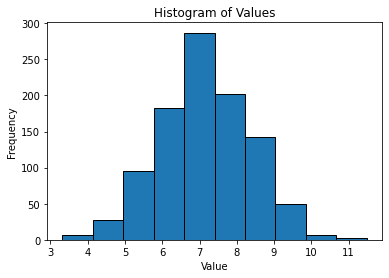

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot a histogram of the data
df["fixed acidity"].plot.hist(edgecolor='black')

# add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Values')
plt.show()

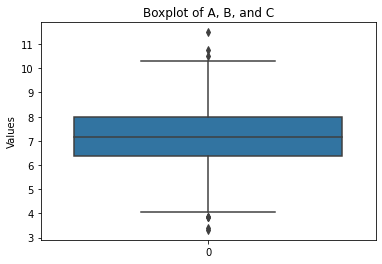

In [36]:
sns.boxplot(data=df["fixed acidity"])

# add labels and title
# plt.xlabel('Variables')
plt.ylabel('Values')
plt.title('Boxplot of A, B, and C')

# show the plot
plt.show()

In [18]:
from scipy.stats import normaltest
def normality_test(col):
    statistic, p_value = normaltest(df[col])

    # print the test results
    print('Normality test statistic:', statistic)
    print('p-value:', p_value)

    if p_value < 0.05:
        # print('The data is not normally distributed.')
        return False
    else:
        # print('The data is normally distributed.')
        return True
        
print("Normality column 1 : ",normality_test("fixed acidity"))

Normality test statistic: 0.14329615661430725
p-value: 0.9308584274486692
Normality column 1 :  True
